---
title: "Classification Decision Tree"
format: html
execute:
    echo: true
code-fold: true
link-external-newwindow: true
bibliography: reference.bib
website:
  back-to-top-navigation: true
---

## Methods

**Decision Tree:**

Decision trees are a powerful tool in machine learning that mimics the way humans make decisions. Imagine you have a complex problem, and you're trying to solve it by breaking it down into a series of simpler decisions. A decision tree does just that. It starts with a big question at the top (the root) and then branches out into a series of smaller questions based on the answers at each step. These questions are based on the features of your data, and the goal is to ultimately reach a decision or prediction at the leaves of the tree. Each decision is made by evaluating the importance of different features in the data, helping the model to learn patterns and make accurate predictions.

**Random Forest:**

Random Forest takes the idea of decision trees a step further by creating a "forest" or a collection of decision trees. Each tree is trained on a different subset of the data and makes its own set of predictions. Instead of relying on just one tree, Random Forest combines the predictions from all the trees to make a more robust and accurate final prediction. The "random" part comes from the fact that each tree is trained on a random subset of features, adding an element of diversity. This helps prevent overfitting, where the model becomes too tailored to the training data and performs poorly on new, unseen data. By leveraging the collective intelligence of multiple trees, Random Forest provides a more reliable and generalizable solution.

**XGBoost:**

XGBoost, or Extreme Gradient Boosting, is a sophisticated algorithm that excels in predictive modeling. At its core, XGBoost is an ensemble method like Random Forest, but it uses a different strategy. Instead of training all the trees independently, XGBoost builds them sequentially, learning from the mistakes of the previous ones. It's like a team of experts playing a game, with each expert focusing on the aspects where others fell short. XGBoost is particularly good at handling complex relationships in the data, capturing patterns that might be difficult for other algorithms. It also incorporates a regularization term to control the complexity of the model, preventing it from becoming too intricate and overfitting the training data. Overall, XGBoost is a powerful and flexible tool for making accurate predictions in a wide range of applications.

## Class Distribution
In the below code, I take the EDM subgenre dataset and look at the class distribution of the target labels. As shown in the [data exploration](data_exploration.ipynb) tab of the website, I had intentionally balanced the classes in order to have an evenly distributed dataset; each genre has 3786 tracks. Having evenly distributed class labels in a dataset, often referred to as class balance or class distribution, can offer several advantages in the context of machine learning:

1. **Improved Model Performance:**
   - **Preventing Bias:** Models trained on imbalanced datasets may develop a bias towards the majority class, leading to poorer performance on minority classes. A balanced distribution helps ensure that the model learns to recognize patterns from all classes equally, leading to a more accurate and fair predictive model.

2. **Better Generalization:**
   - **Enhanced Generalization:** Models trained on imbalanced data might perform well on the training set but struggle to generalize to new, unseen data. A balanced dataset helps in creating models that are more likely to generalize well, as they are exposed to a representative distribution of examples from each class during training.

3. **More Robust Evaluation:**
   - **Accurate Evaluation Metrics:** Imbalanced datasets can mislead the evaluation of a model. For example, accuracy may seem high, but it might be due to the model predicting the majority class most of the time. Balanced datasets provide a more reliable evaluation, allowing for the use of metrics like precision, recall, and F1 score that consider the performance across all classes.

4. **Stable Training:**
   - **Stable Convergence:** Training models on imbalanced data can lead to instability in the learning process. An evenly distributed dataset often contributes to a more stable convergence during training, preventing the model from getting stuck in local minima and improving convergence speed.

5. **Reduced Sensitivity to Data Changes:**
   - **Robustness to Data Drift:** In real-world applications, the distribution of data may change over time. Models trained on balanced datasets tend to be more robust to such changes, as they have learned patterns from all classes rather than being overly specialized in the majority class.

6. **Enhanced Feature Importance:**
   - **Accurate Feature Importance:** In imbalanced datasets, models may assign exaggerated importance to features correlated with the majority class. Balanced datasets allow models to assign importance more accurately, reflecting the actual contribution of features to the prediction of each class.

While having balanced class labels is often beneficial, it's essential to note that real-world data is not always perfectly balanced. In cases of significant class imbalance, techniques such as oversampling the minority class, undersampling the majority class, or using specialized algorithms designed for imbalanced data may be employed to address these challenges.


In [ ]:
df.genre.value_counts()

genre
trance           3786
tech house       3786
techno           3786
drum and bass    3786
dubstep          3786
Name: count, dtype: int64

## Baseline Model for Comparison

The baseline comparison using a random classifier serves as a critical benchmark in evaluating the performance of more sophisticated machine learning models. The purpose of the random classifier is to establish a baseline level of performance that any meaningful model should surpass. This baseline is particularly important when dealing with classification tasks, as it helps assess whether the chosen model is learning patterns from the data or is merely performing at a chance level. By comparing accuracy, precision, recall, and F1-score metrics from the random classifier against those of a trained model, one can gauge the model's effectiveness in capturing relevant patterns and making informed predictions. This baseline comparison is instrumental in validating the significance of the machine learning model's contributions to the task at hand, guiding researchers and practitioners in the development and selection of effective classification algorithms.

In [ ]:
import random
import numpy as np
from collections import Counter
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def generate_balanced_data(num_labels, N=10000):
    # Generates N random labels with balanced load across all labels.
    weights = [1/num_labels] * num_labels
    labels = list(range(num_labels))
    y = random.choices(labels, weights=weights, k=N)
    return y

# TEST
num_labels = 5
y = generate_balanced_data(num_labels, 10000)

def random_classifier(y_data):
    # Implements a random classifier that predicts labels randomly.
    max_label = np.max(y_data)
    
    # Generate random predictions within the range of labels.
    y_pred = [int(np.floor((max_label + 1) * np.random.uniform(0, 1))) for _ in range(len(y_data))]
    
    # Print information about the random classifier's predictions.
    print("-----RANDOM CLASSIFIER-----")
    print("count of prediction:", Counter(y_pred).values())
    print("probability of prediction:", np.fromiter(Counter(y_pred).values(), dtype=float) / len(y_data))
    print("accuracy:", accuracy_score(y_data, y_pred))
    precision, recall, _, _ = precision_recall_fscore_support(y_data, y_pred, average='macro')
    print("precision:", precision)
    print("recall:", recall)

# Testing the random classifier with balanced labels
print("\nMULTI-CLASS:  BALANCED LOAD")
y = generate_balanced_data(num_labels, 10000)
random_classifier(y)



MULTI-CLASS:  BALANCED LOAD
-----RANDOM CLASSIFIER-----
count of prediction: dict_values([2062, 2012, 1931, 2044, 1951])
probability of prediction: [0.2062 0.2012 0.1931 0.2044 0.1951]
accuracy: 0.2017
precision: 0.20162185181207337
recall: 0.20156229528691672


## Decision Tree Classifier

### Final Results

After modeling the decision tree, the below are the results:
* Accuracy: 69.18%
    * The accuracy is the ratio of correctly predicted instances to the total instances. In this case, approximately 69.18% of the test set instances were predicted correctly by the Decision Tree Classifier.
* Precision: 69.19%
    * Precision is a measure of the accuracy of the positive predictions. In this context, it indicates that around 69.19% of the instances predicted as positive by the model were actually positive.
* Recall: 69.17%
    * Recall (or sensitivity) measures the ability of the model to capture all the relevant instances. A recall of 69.17% means that the model identified around 69.17% of the actual positive instances in the dataset.


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt

# Assuming 'genre' is the target column
target_column = 'genre'

# Split the data into features (X) and the target variable (y)
X = df.select_dtypes(include='number')
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("-----DECISION TREE CLASSIFIER-----")
print("Accuracy:", accuracy_score(y_test, y_pred))
precision, recall, _, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precision:", precision)
print("Recall:", recall)



-----DECISION TREE CLASSIFIER-----
Accuracy: 0.6917591125198098
Precision: 0.6919464788765407
Recall: 0.691736509738276


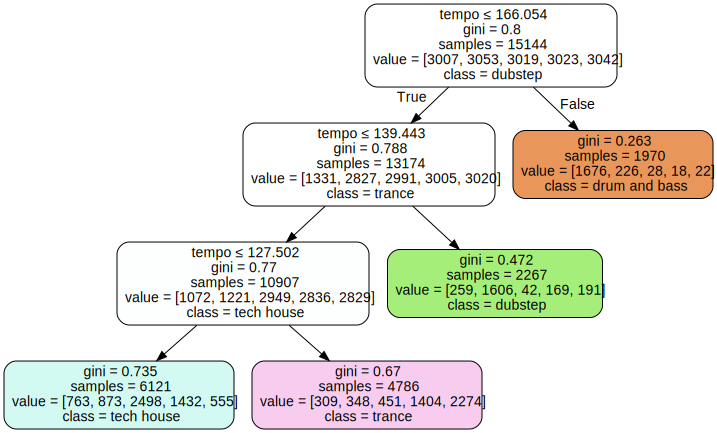

In [ ]:
import graphviz
def visualize_tree(dtc_object):
  dot_data = sklearn.tree.export_graphviz(dtc_object, out_file=None,
                      feature_names=X_train.columns,
                      class_names=list(genre_map.keys()),
                      filled=True, rounded=True,
                      special_characters=True)
  graph = graphviz.Source(dot_data)
  graph.render(outfile="test.svg")
  return graph
visualize_tree(dtc)

## Random Forest Classifier

### Final Results
After performing hyper-parameter tuning on our random forest algorithm, the results very slightly improved:
* Accuracy: 77.87%
    * The accuracy is the ratio of correctly predicted instances to the total instances. In this case, approximately 77.87% of the test set instances were predicted correctly by the Decision Tree Classifier.
* Precision: 77.87%
    * Precision is a measure of the accuracy of the positive predictions. In this context, it indicates that around 77.87% of the instances predicted as positive by the model were actually positive.
* Recall: 77.82%
    * Recall (or sensitivity) measures the ability of the model to capture all the relevant instances. A recall of 77.82% means that the model identified around 77.82% of the actual positive instances in the dataset.


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

target_column = 'genre'

# Split the data into features (X) and the target variable (y)
X = df.select_dtypes(include='number')
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("-----RANDOM FOREST CLASSIFIER-----")
print("Accuracy:", accuracy_score(y_test, y_pred))

# Calculate precision and recall
precision, recall, _, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precision:", precision)
print("Recall:", recall)


-----RANDOM FOREST CLASSIFIER-----
Accuracy: 0.7778658214474379
Precision: 0.7787186900592407
Recall: 0.7781547761093727


### Hyper-Parameter Tuning

In [ ]:

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

target_column = 'genre'

# Split the data into features (X) and the target variable (y)
X = df.select_dtypes(include='number')
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define hyperparameters and their possible values for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use Grid Search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train a Random Forest Classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)
best_rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf_classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))

# Calculate precision and recall
precision, recall, _, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precision:", precision)
print("Recall:", recall)


Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.7786582144743793
Precision: 0.7794206959651867
Recall: 0.7788913235366173


## XGBoost Classifier

### Final Results
After performing hyper-parameter tuning on our XGBoost algorithm, the results very slightly improved:
* Accuracy: 78.79%
    * The accuracy is the ratio of correctly predicted instances to the total instances. In this case, approximately 78.79% of the test set instances were predicted correctly by the Decision Tree Classifier.
* Precision: 78.96%
    * Precision is a measure of the accuracy of the positive predictions. In this context, it indicates that around 78.96% of the instances predicted as positive by the model were actually positive.
* Recall: 78.82%
    * Recall (or sensitivity) measures the ability of the model to capture all the relevant instances. A recall of 78.82% means that the model identified around 78.82% of the actual positive instances in the dataset.

In [ ]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

target_column = 'genre'

# Create a label encoder and fit it to the target variable
label_encoder = LabelEncoder()
df['encoded_genre'] = label_encoder.fit_transform(df[target_column])

# Split the data into features (X) and the target variable (y)
# Filter for only numeric columns in the feature matrix
X = df.select_dtypes(include=['number']).drop('encoded_genre', axis=1)
y = df['encoded_genre']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Decode the predicted labels back to the original class labels
y_pred_original = label_encoder.inverse_transform(y_pred)

# Evaluate the model
print("-----XGBOOST CLASSIFIER-----")
print("Accuracy:", accuracy_score(y_test, y_pred))
precision, recall, _, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precision:", precision)
print("Recall:", recall)


-----XGBOOST CLASSIFIER-----
Accuracy: 0.7823560486001057
Precision: 0.7838098236528813
Recall: 0.7824599382154643


### Hyper-Parameter Tuning

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# Assuming 'genre' is the target column
target_column = 'genre'

# Create a label encoder and fit it to the target variable
label_encoder = LabelEncoder()
df['encoded_genre'] = label_encoder.fit_transform(df[target_column])

# Split the data into features (X) and the target variable (y)
X = df.select_dtypes(include=['number']).drop('encoded_genre', axis=1)
y = df['encoded_genre']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Define a parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Create GridSearchCV object
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Use the best parameters to train the final model
final_model = xgb.XGBClassifier(**best_params, random_state=42)
final_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = final_model.predict(X_test)

# Decode the predicted labels back to the original class labels
y_pred_original = label_encoder.inverse_transform(y_pred)

# Evaluate the model
print("-----XGBOOST CLASSIFIER-----")
print("Best Parameters:", best_params)
print("Accuracy:", accuracy_score(y_test, y_pred))
precision, recall, _, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Precision:", precision)
print("Recall:", recall)


-----XGBOOST CLASSIFIER-----
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Accuracy: 0.7879027997886952
Precision: 0.7895878189560148
Recall: 0.7880435869170253


## Overall Conclusions & Summary

#### Decision Tree Classifier:
- **Accuracy:** 69.18%
- **Precision:** 69.19%
- **Recall:** 69.17%

**Conclusion:**
The Decision Tree Classifier, while providing a baseline, might face challenges in capturing the intricate relationships inherent in EDM subgenre classification. It may not be sufficient for discerning the nuanced patterns associated with different EDM subgenres.

#### Random Forest Classifier:
  - **Accuracy:** 77.87%
  - **Precision:** 77.94%
  - **Recall:** 77.89%

**Conclusion:**
The Random Forest Classifier, with or without tuning, offers an improvement over the Decision Tree, making it more suitable for capturing the diverse patterns and characteristics associated with different EDM subgenres. It can handle multiple features simultaneously and provides a solid foundation for EDM subgenre classification.

#### XGBoost Classifier:
- **Accuracy:** 78.79%
- **Precision:** 78.96%
- **Recall:** 78.80%

**Conclusion:**
XGBoost, known for its superior performance in various contexts, including structured data, demonstrates competitive accuracy in predicting EDM subgenres. Its ability to handle complex relationships and adapt to sequential learning makes it a strong candidate for EDM subgenre classification tasks.

#### Overall Recommendation:
- **Decision Tree:** While interpretable, it may struggle to capture the nuances of EDM subgenres. Consider it as a starting point or for simple cases.

- **Random Forest:** A robust choice, especially after hyperparameter tuning, providing a good balance between interpretability and predictive power for EDM subgenre classification.

- **XGBoost:** Offers high accuracy and is well-suited for complex patterns in EDM subgenres. Consider it for tasks where precision and recall are crucial.

In our exploration of predicting EDM subgenres using machine learning models like Decision Trees, Random Forests, and XGBoost, we uncovered some interesting insights. Imagine these models as detectives trying to understand the distinct characteristics that define different types of electronic dance music. What we found was that the Random Forest and XGBoost detectives were particularly skilled at deciphering the intricate patterns that distinguish one EDM subgenre from another, outperforming the simpler Decision Tree detective.

This discovery is important because it opens up new possibilities for music enthusiasts and industry professionals alike. By leveraging these advanced models, we can more accurately categorize and identify EDM subgenres, offering a deeper understanding of the unique elements that make each genre special. Imagine having a virtual music expert that can not only recognize your favorite subgenres but also introduce you to new and exciting ones based on subtle musical features.

However, our journey wasn't without its challenges. The Decision Tree detective, while straightforward, struggled to grasp the complexity of EDM subgenres. Yet, with the Random Forest and XGBoost detectives, armed with their ability to collaborate and adapt, we were able to overcome these limitations and create a more nuanced picture of the EDM landscape.

